In [69]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE

In [8]:
data = pd.read_csv('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_representative_regions(ver240113).csv')

In [9]:
data['lossch4_no'] = data['lossch4']/data['no']
data = data[data['region']!="SGP"]
data = data[data['region']!="VAN"]

In [43]:
lch4_no_region_mean = data.groupby(['region']).mean()['lossch4_no']
lch4_no_region_std = data.groupby(['region']).std()['lossch4_no']
lch4_no_region_ct = data.groupby(['region']).count()['lossch4_no']
lch4_no_region_ste = lch4_no_region_std/np.sqrt(lch4_no_region_ct/5)

ch3o2_region_mean = data.groupby(['region']).mean()['ch3o2_mole']
ch3o2_region_std = data.groupby(['region']).std()['ch3o2_mole']
ch3o2_region_ct = data.groupby(['region']).count()['ch3o2_mole']
ch3o2_region_ste = ch3o2_region_std/np.sqrt(ch3o2_region_ct/5)

In [44]:
lch4 = pd.DataFrame()
lch4['lch4_no_mean'] = lch4_no_region_mean
lch4['lch4_no_ste'] = lch4_no_region_ste
lch4['ch3o2_mean'] = ch3o2_region_mean
lch4['ch3o2_ste'] = ch3o2_region_ste
lch4

,lch4_no_mean,lch4_no_ste,ch3o2_mean,ch3o2_ste
region,,,,
AUS,0.001461,0.000235,4.367187e+06,7.198960e+05
BRA,0.001319,0.000121,4.338039e+06,4.031979e+05
BTH,0.000011,0.000002,3.539241e+04,7.119807e+03
CA,0.000311,0.000068,9.629251e+05,2.133177e+05
CCE,0.000119,0.000017,3.543326e+05,4.902858e+04
COD,0.000816,0.000042,2.626381e+06,1.335638e+05
DEU,0.000277,0.000048,8.232739e+05,1.448519e+05
FIN,0.000672,0.000125,1.932532e+06,3.656893e+05
FRA,0.000736,0.000052,2.183547e+06,1.581482e+05


In [45]:
lch4

,lch4_no_mean,lch4_no_ste,ch3o2_mean,ch3o2_ste
region,,,,
AUS,0.001461,0.000235,4.367187e+06,7.198960e+05
BRA,0.001319,0.000121,4.338039e+06,4.031979e+05
BTH,0.000011,0.000002,3.539241e+04,7.119807e+03
CA,0.000311,0.000068,9.629251e+05,2.133177e+05
CCE,0.000119,0.000017,3.543326e+05,4.902858e+04
COD,0.000816,0.000042,2.626381e+06,1.335638e+05
DEU,0.000277,0.000048,8.232739e+05,1.448519e+05
FIN,0.000672,0.000125,1.932532e+06,3.656893e+05
FRA,0.000736,0.000052,2.183547e+06,1.581482e+05


In [72]:
mod = LinearRegression()
X = lch4[['lch4_no_mean']]*10**3
y = lch4['ch3o2_mean']*10**(-6)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
print(np.sqrt(MSE(y_pred, y)))

[3.12452546]
-0.041032430379352114
0.9962193451343359
0.16887663349867113


([<matplotlib.axis.XTick at 0x7ff167ea7fd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

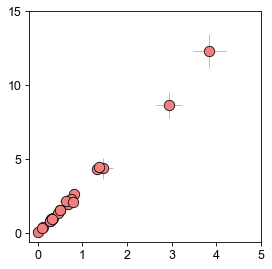

In [47]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
x_values = lch4['lch4_no_mean']*10**3
y_values = lch4['ch3o2_mean']*10**(-6)
x_errors = lch4['lch4_no_ste']*10**3
y_errors = lch4['ch3o2_ste']*10**(-6)


#plt.scatter(x_values, y_values, c='red', s=50, marker='o', linewidths=0.75, edgecolors='black')
plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='lightcoral', mec='black', alpha=1, ms=10, mew=0.75)

plt.yticks([0, 5, 10, 15], fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5], fontsize=12)

<ErrorbarContainer object of 3 artists>

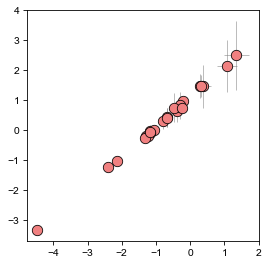

In [48]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
lg_x_values = np.log(x_values)
lg_y_values = np.log(y_values)
lg_x_errors = np.log(x_errors)
lg_y_errors = np.log(y_errors)


#plt.scatter(x_values, y_values, c='red', s=50, marker='o', linewidths=0.75, edgecolors='black')
plt.errorbar(lg_x_values, lg_y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='lightcoral', mec='black', alpha=1, ms=10, mew=0.75)

#plt.yticks([0, 5, 10, 15], fontsize=12)
#plt.xticks([0, 1, 2, 3, 4, 5], fontsize=12)

In [70]:
mod = LinearRegression()
X = lch4[['lch4_no_mean']]*10**3
y = lch4['ch3o2_mean']*10**(-6)
mod.fit(np.log(X),np.log(y))
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(np.log(X))
print(r2_score(y_pred, np.log(y)))
print(np.sqrt(MSE(y_pred, np.log(y))))

[1.00397494]
1.1139612828190604
0.9980279590084873
0.051683113070686154


In [50]:
data_sens = pd.read_csv('Fig. 3b SnSv sensitivities scatter plot.csv')

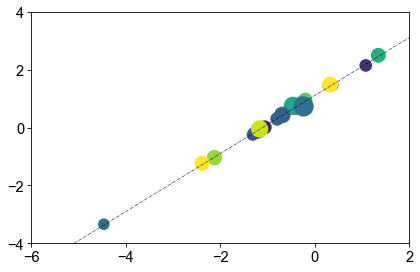

In [68]:
fig, ax = plt.subplots(figsize=(6.5, 4), dpi=75)
X = lch4[['lch4_no_mean']]*10**3
y = lch4['ch3o2_mean']*10**(-6)
size = data_sens['o3_ppb']
o3net = data_sens['o3net_mole']

x_set = np.arange(-6,3,0.1)
y_set = x_set*mod.coef_+mod.intercept_
plt.plot(x_set, y_set, linestyle='-.', linewidth=0.5, color="black")

plt.scatter(np.log(X),np.log(y), s=size**1.5, vmin=0, vmax=1.5, c=o3net, cmap="viridis")

#plt.colorbar()
plt.xlim([-6,2])
plt.ylim([-4,4])
plt.yticks([-4,-2,0,2,4], fontsize=14)
plt.xticks([-6,-4,-2,0,2], fontsize=14)

plt.savefig("Fig. 3c L(CH4)_NO-CH3O2.pdf", format="pdf", bbox_inches="tight")